In [25]:
import pandas as pd

df = pd.read_csv('df_ok.csv')
df.head()

,data,dia_semana,adr,occ
0,2022-01-01,6,186.612727,34.375000
1,2022-01-02,0,183.996667,37.500000
2,2022-01-03,1,193.209500,41.666667
3,2022-01-04,2,184.547609,47.916667
4,2022-01-05,3,184.261111,56.250000


In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
occ_series = df['occ']
adr_series = df['adr']

In [31]:
model_occ = SARIMAX(occ_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result_occ = model_occ.fit(disp=False)

In [32]:
model_adr = SARIMAX(adr_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result_adr = model_adr.fit(disp=False)

In [33]:
forecast_occ = result_occ.get_forecast(steps=365).predicted_mean
forecast_adr = result_adr.get_forecast(steps=365).predicted_mean

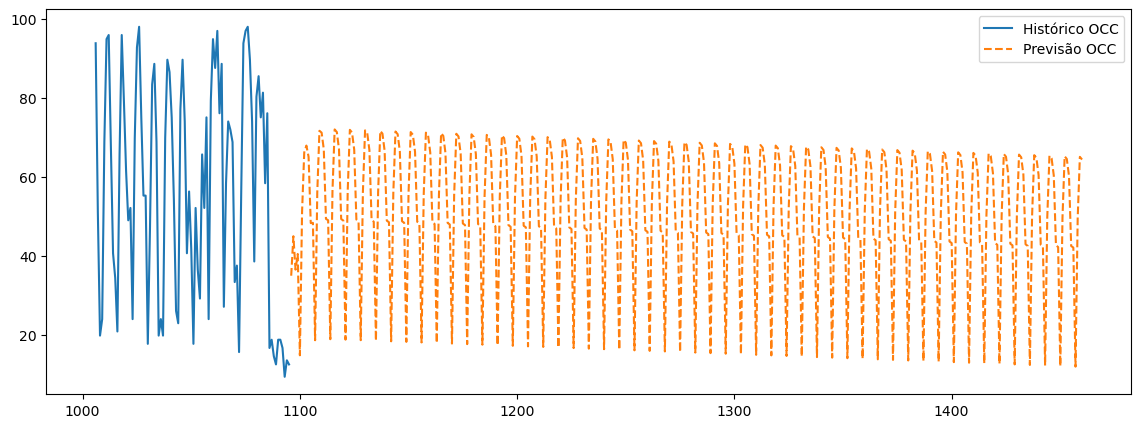

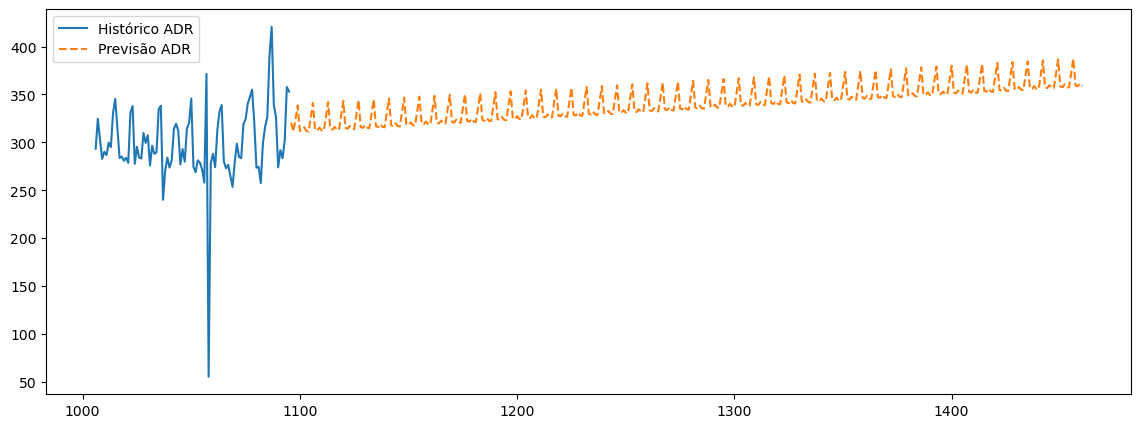

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(occ_series[-90:], label='Histórico OCC')
plt.plot(forecast_occ.index, forecast_occ, label='Previsão OCC', linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(adr_series[-90:], label='Histórico ADR')
plt.plot(forecast_adr.index, forecast_adr, label='Previsão ADR', linestyle='--')
plt.legend()
plt.show()

In [35]:
forecast_occ

1096    34.945509
1097    44.930780
1098    36.482221
1099    40.440140
1100    14.808420
          ...    
1456    42.057787
1457    11.937136
1458    49.428530
1459    65.012733
1460    64.333690
Name: predicted_mean, Length: 365, dtype: float64

In [36]:
forecast_adr

1096    320.518628
1097    311.187419
1098    324.494642
1099    338.528075
1100    311.904434
           ...    
1456    387.467646
1457    359.334348
1458    358.578788
1459    361.572160
1460    358.668952
Name: predicted_mean, Length: 365, dtype: float64